# Pandas - Data Science with Python

Numpy and numpy arrays are our tool of choice for numeric data that resembles vectors, matrices (and higher dimensional tensors).

Where data is gathered from experiments, and in particular where we want to extract meaning from the combination of different data sources, and where data is often incomplete, the pandas library offers a number of useful tools (and has become a standard tool for data scientists).

In this section, we introduce the basics of Pandas.

In particular, we introduce the two key data types in Pandas: the ``Series`` and the ``DataFrame`` objects.

By convention, the `pandas` library is imported under the name `pd` (the same way that `numpy` is imported under the name `np`:

In [1]:
import pandas as pd

## Motivational example


Imagine we are working on software for a greengrocer or supermarket, and need to track the number of apples (10), oranges(3) and bananas (22) that are available in the supermarket. 

We could use a python list (or a numpy array) to track these numbers:

In [2]:
stock = [10, 3, 22]

However, we would need to remember separately that the entries are in the order of apples, oranges, and bananas. This could be achieved through a second list: 

In [3]:
stocklabels = ['apple', 'orange', 'banana']

In [4]:
assert len(stocklabels) == len(stock)  # check labels and 
                                       # stock are consistent
for label, count in zip(stocklabels, stock):
    print('{:10s} : {:4d}'.format(label, count))

apple      :   10
orange     :    3
banana     :   22


The above 2-list solution is a little awkward in two ways: firstly, we have use two lists to describe one set of data (and thus need to be carefuly to update them simulatenously, for example), and secondly, the access to the data given a label is inconvenient: We need to find the index of the label with one list, then use this as the index to the other list, for example

In [5]:
index = stocklabels.index('banana')
bananas = stock[index]
print("There are {} banasis [index={}].".format(bananas, index))

There are 22 banasis [index=2].


We have come across similar examples in the section on dictionaries, and indeed a dictionary is a more convenient solution:

In [6]:
stock_dic = {'apple': 10, 
             'orange': 3,
             'banana': 22}

In a way, the keys of the dictionary contain the stock labels and the values contain the actual values:

In [7]:
stock_dic.keys()

dict_keys(['apple', 'orange', 'banana'])

In [8]:
stock_dic.values()

dict_values([10, 3, 22])

To retrieve (or change) the value for `apple`, we use `apple` as the key and retrieve the value through the dictionary's indexing notation:

In [9]:
stock_dic['apple']

10

And we can summarise the stock as follows:

In [10]:
for label in stock_dic:
    print('{:10s} : {:4d}'.format(label, stock_dic[label]))

apple      :   10
orange     :    3
banana     :   22


This is a vast improvement over the 2-lists solution: (i) we only maintain one structure, which contains a value for every key - so we don't need to check that the lists have the same length. (ii) we can access individual elements through the label (using it as a key for the dictionary). 

The Pandas Series object address the requriments above. It is similar to a dictionary, but with improvements for the given problem:

* the order of the items is maintained
* the values have to have the same type (higher execution performance)
* a (large) number of convenience functions, for example to deal with missing data, time series, merging different data set, and more

## Pandas `Series`

We can create a `Series` object - for example - from a dictionary:

In [11]:
stock = pd.Series({'apple': 10, 
                   'orange': 3,
                   'banana': 22})

The default presentation shows the entries one per row, with the label on the left, and the value on the right. 

In [12]:
stock

apple     10
orange     3
banana    22
dtype: int64

The items on the left are referred to as the `index` of the Series, and are available as the `index` attribute of the `series` object:

In [13]:
stock.index

Index(['apple', 'orange', 'banana'], dtype='object')

In [14]:
type(stock.index)

pandas.core.indexes.base.Index

We can also access the list of values for each item, using the `values` attribute:

In [15]:
stock.values

array([10,  3, 22])

Regarding data access, the `Series` object behaves like a dictionary:

In [16]:
stock['apple']

10

In [17]:
stock['potato'] = 101    # adding more values
stock['cucumber'] = 1


In [18]:
print(stock)

apple        10
orange        3
banana       22
potato      101
cucumber      1
dtype: int64


In [19]:
stock

apple        10
orange        3
banana       22
potato      101
cucumber      1
dtype: int64

The `Series` object has a number of numerical methods available, including `mean` and `sum`:

In [20]:
stock.sum()

137

In [21]:
stock.mean()

27.4

It also behaves like a sequence in that the `len` function returns the number of data points in the Series object:

In [22]:
len(stock)

5

For larger data sets, it might be important to know how many bytes storing the Series costs:

In [23]:
stock.nbytes

40

A number of statistical descriptors of the data in the `stock` Series object is available using `describe()`:

In [24]:
stock.describe()

count      5.000000
mean      27.400000
std       41.955929
min        1.000000
25%        3.000000
50%       10.000000
75%       22.000000
max      101.000000
dtype: float64

As usual, the documentation strings provide documentation (`help(stock.describe)`), and the pandas home page (`https://pandas.pydata.org`) provides links to the Pandas documentation.


## Create Series from list

In the example above, we showed how to create a Series from a dictionary. We can also create a Series from a list, an provide an additional index:

In [25]:
stock = pd.Series([10, 3, 22], index=['apple', 'orange', 'banana'])

In [26]:
stock

apple     10
orange     3
banana    22
dtype: int64

If we omit the `index` argument, the Series will assume an integer index:

In [27]:
stock = pd.Series([10, 3, 22])

In [28]:
stock

0    10
1     3
2    22
dtype: int64

However, an index can be added subsequently:

In [29]:
stock.index = ['apple', 'orange', 'banana']

In [30]:
stock


apple     10
orange     3
banana    22
dtype: int64

## Plotting data

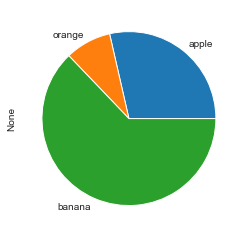

In [31]:
%matplotlib inline
import seaborn as sb
sb.set_style("whitegrid")
ax = stock.plot.pie()
ax.set_aspect(1)

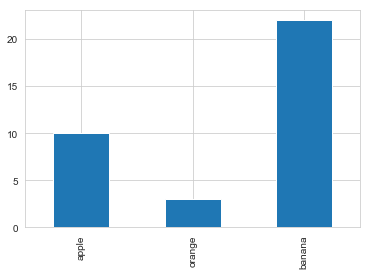

In [32]:
stock.plot.bar()

## Missing values

"Real" data sets tend to be incomplete. Dealing with missing values is an important topic in data science. The agreement in Pandas is that the special floating point value "NaN" (standing for `N`ot `a` `N`umber) represents missing data points. For example, if we have a table for the stock, but we don't know the value for `apple`, we would replace it with `NaN`. 

The special `Nan` value in Python can be created using `float('nan')` or using `numpy.nan` if the `numpy` module is imported.

In [33]:
stock['apple'] = float('nan')

In [34]:
stock

apple      NaN
orange     3.0
banana    22.0
dtype: float64

Note that the `dtype` of the `stock` Series object has changed from `int64` to `float64` when we assigned `NaN` to `apple`: the whole series has been converted to float, because `NaN` is only defined for floating point numbers.

Assume we need to calculate how many items of stock we have in total using the `sum` function:

In [35]:
stock.values

array([nan,  3., 22.])

A common situation is that we have an incomplete Series or DataFrame (which are multiple Series with the same index) and we want to process with our analysis, but treat the missing values in a special way.

In [36]:
stock.sum()

25.0

In [37]:
stock.dropna()

orange     3.0
banana    22.0
dtype: float64